In [44]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()

In [45]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

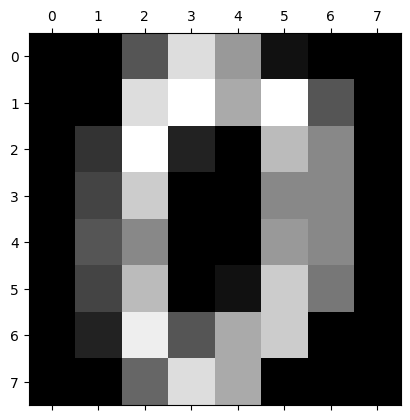

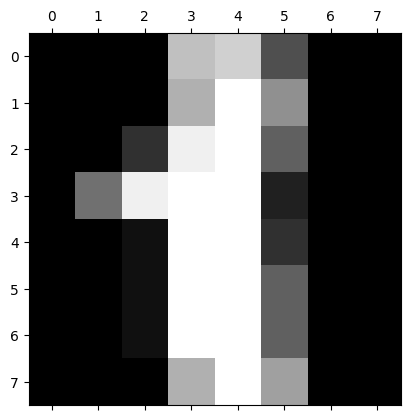

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])


In [101]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [102]:
#create target column which is actulal result we want.
df['target'] = digits.target
df.head()


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [103]:
#get train and test data from sklearn
from sklearn.model_selection import train_test_split
#target column is removed feom traning and test data and 20% of data is used as test data 
X_train,X_text,Y_train,Y_test = train_test_split(df.drop(['target'], axis='columns'), digits.target,test_size=0.2)


In [104]:
#use multiple algorithm to predict the output. As we are using Random forest algorithm, we will have multiple descision trees
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=70) #n_estimators= number of descision trees
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=70)

In [105]:
model.score(X_text,Y_test)

0.9694444444444444

In [106]:
y_predicted = model.predict(X_text)

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm #display in matrix

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 39,  0],
       [ 0,  1,  0,  1,  0,  2,  0,  0,  0, 31]])

Text(95.72222222222221, 0.5, 'Truth')

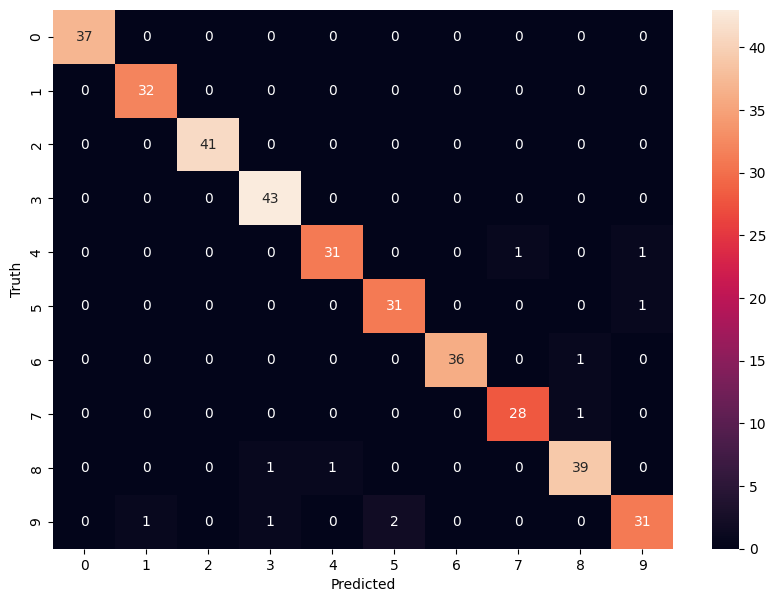

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')